In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [267]:
#Median Income
Y2018 = pd.read_csv('2018_med_income.csv')
Y2017 = pd.read_csv('2017_med_income.csv')
Y2016 = pd.read_csv('2016_med_income.csv')
Y2015 = pd.read_csv('2015_med_income.csv')
Y2014 = pd.read_csv('2014_med_income.csv')
Y2013 = pd.read_csv('2013_med_income.csv')
Y2012 = pd.read_csv('2012_med_income.csv')
Y2011 = pd.read_csv('2011_med_income.csv')
Y2010 = pd.read_csv('2010_med_income.csv')

def get_avg_income(df):
    df = df.drop(df.columns[[-1,-2,-3,-4]], axis=1)
    df = df.set_index(df['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])

    household = df.iloc[:,2]
    household = household[household!='-']
    household = household[household!='(X)']
    return np.average(household.astype(float))

sf_median_income = [get_avg_income(Y2010),get_avg_income(Y2011),get_avg_income(Y2012),get_avg_income(Y2013),
                    get_avg_income(Y2014),get_avg_income(Y2015),get_avg_income(Y2016),get_avg_income(Y2017),
                    get_avg_income(Y2018)]

def get_tract_income(df,tract):
    x = df.set_index(df['Geographic Area Name'].str.extract('(\d+.*\d+)')[0]).iloc[:,2][tract]
    return x

get_tract_income(Y2018,'102')

'134176'

In [204]:
#housing price
housing = pd.read_csv('Effect - Housing Prices (Zillow).csv')
housing = housing.drop(['Metro','StateName','State','City','RegionType','CountyName'],axis=1)
dates = list(housing.columns[housing.columns.str.match('12/31/1[0-8]{1}')])
sf_housing_prices = housing[dates].mean()

In [273]:
#demographics
dem_2018 = pd.read_csv('2018_demographic.csv')
dem_2017 = pd.read_csv('2017_demographic.csv')
dem_2016 = pd.read_csv('2016_demographic.csv')
dem_2015 = pd.read_csv('2015_demographic.csv')
dem_2014 = pd.read_csv('2014_demographic.csv')
dem_2013 = pd.read_csv('2013_demographic.csv')
dem_2012 = pd.read_csv('2012_demographic.csv')
dem_2011 = pd.read_csv('2011_demographic.csv')
dem_2010 = pd.read_csv('2010_demographic.csv')

def get_avg_demographics(df):
    df= df.set_index(df['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
    minority = (df.iloc[:,2]- df.iloc[:,4])/ df.iloc[:,2]
    return minority.mean()

sf_nonwhite = [get_avg_demographics(dem_2010),get_avg_demographics(dem_2011),get_avg_demographics(dem_2012),
                  get_avg_demographics(dem_2013),get_avg_demographics(dem_2014),get_avg_demographics(dem_2015),
                  get_avg_demographics(dem_2016),get_avg_demographics(dem_2017),get_avg_demographics(dem_2018)]


dem_2018.set_index(dem_2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])

# def get_tract_demo(df,tract):
#     x = df.set_index(df['Geographic Area Name'].str.extract('(\d+.*\d+)')[0]).iloc[:,2][tract]
    
#     return x

,Geographic Area Name,id,Estimate Total,Margin of Error Total,Estimate Total White alone,Margin of Error Total White alone,Estimate Total Black or African American alone,Margin of Error Total Black or African American alone,Estimate Total American Indian and Alaska Native alone,Margin of Error Total American Indian and Alaska Native alone,...,Estimate Total Native Hawaiian and Other Pacific Islander alone,Margin of Error Total Native Hawaiian and Other Pacific Islander alone,Estimate Total Some other race alone,Margin of Error Total Some other race alone,Estimate Total Two or more races,Margin of Error Total Two or more races,Estimate Total Two or more races Two races including Some other race,Margin of Error Total Two or more races Two races including Some other race,"Estimate Total Two or more races Two races excluding Some other race, and three or more races","Margin of Error Total Two or more races Two races excluding Some other race, and three or more races"
0,,,,,,,,,,,,,,,,,,,,,
156,"Census Tract 156, San Francisco County, Califo...",1400000US06075015600,3432,338,1970,332,71,48,0,12,...,0,12,42,44,224,98,16,25,208,95
102,"Census Tract 102, San Francisco County, Califo...",1400000US06075010200,4299,406,3444,385,60,67,0,12,...,9,17,57,93,155,109,0,12,155,109
108,"Census Tract 108, San Francisco County, Califo...",1400000US06075010800,4860,526,2513,359,0,12,0,12,...,0,12,34,41,169,84,42,48,127,75
331,"Census Tract 331, San Francisco County, Califo...",1400000US06075033100,3861,389,1592,271,30,38,0,12,...,0,12,30,49,228,138,2,9,226,136
402,"Census Tract 402, San Francisco County, Califo...",1400000US06075040200,5541,479,3304,381,0,17,0,17,...,0,17,89,71,341,161,69,88,272,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804.01,"Census Tract 9804.01, San Francisco County, Ca...",1400000US06075980401,0,12,0,12,0,12,0,12,...,0,12,0,12,0,12,0,12,0,12
9805.01,"Census Tract 9805.01, San Francisco County, Ca...",1400000US06075980501,669,190,36,24,146,120,0,12,...,35,54,104,114,22,23,0,12,22,23
9806,"Census Tract 9806, San Francisco County, Calif...",1400000US06075980600,575,168,159,70,233,103,0,12,...,0,12,37,60,48,66,0,12,48,66


In [5]:
#coffee shops
coffee = pd.read_csv('coffee_sf_filtered.csv')

In [238]:
#evictions


Text(0.5, 1.0, 'SF Gentrification index')

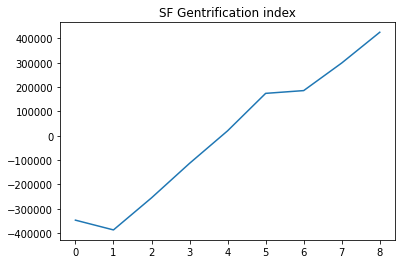

In [259]:
from sklearn.decomposition import PCA

years=pd.Series([2010,2011,2012,2013,2014,2015,2016,2017,2018])

X = pd.DataFrame(sf_median_income)
X = X.rename(columns={0: 'median_income'})
X = X.set_index(years)
X['housing_prices']=list(sf_housing_prices)
X['minority']=sf_nonwhite
X

pca = PCA(n_components=1)
plt.plot(pca.fit_transform(X))
plt.title('SF Gentrification index')

In [269]:
tracts = Y2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0]

